
# **Estadística II – División Ortiz - CFC**

*Daniela Agostina Gonzalez*

# Prueba de hipótesis para la media, varianza conocida - Prueba Bilateral

In [ ]:
# Cargamos librerías
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


**Cambiar la siguiente celda con los datos correspondientes**

In [ ]:
# Nivel de significancia
alfa = 0.05

# Parámetros de la muestra
n = 30  # tamaño de la muestra
media_muestral = 105  # media muestral
desv_estandar = 15  # desviación estándar

# Media poblacional bajo la hipótesis nula
mu_0 = 100



**Cambiar la celda de arriba con los datos correspondientes**

En la siguiente celda llevamos a cabo el procedimiento para la prueba

In [ ]:
# Calcular el estadístico de prueba Z
Z = (media_muestral - mu_0) / (desv_estandar / np.sqrt(n))
print(f"Estadístico de prueba Z: {Z}")


Z_critico = round(stats.norm.ppf(1 - alfa/2),2)

print(f"El estadístico de prueba es {Z:.2f} y el Z crítico es {Z_critico:.2f}")

Estadístico de prueba Z: 1.8257418583505538
El estadístico de prueba es 1.83 y el Z crítico es 1.96


Verificamos la decisión en la siguiente celda

In [ ]:
# Decisión
if abs(Z) > Z_critico:
    print(f"Rechazamos la hipótesis nula. Estadístico Z = {Z:.2f} > Z crítico = {Z_critico:.2f}")
else:
    print(f"No se puede rechazar la hipótesis nula. Estadístico Z = {Z:.2f} < Z crítico = {Z_critico:.2f}")


No se puede rechazar la hipótesis nula. Estadístico Z = 1.83 < Z crítico = 1.96


Gráfico (para prueba bilateral)

Text(0, 0.5, 'Densidad')

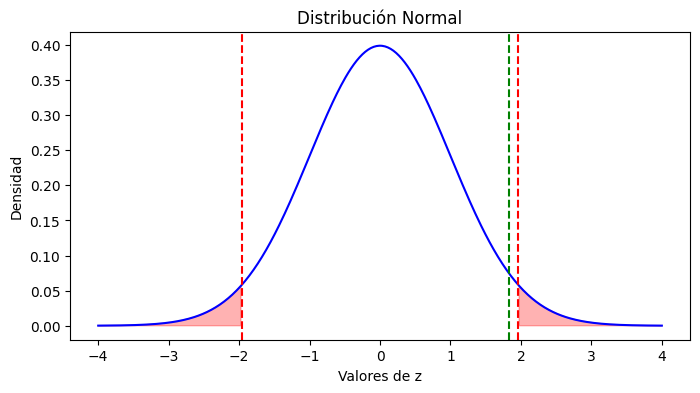

In [ ]:
# Graficamos la distribución Normal Estándar

# Crear un rango de valores Z para la gráfica (eje x)
z_values = np.linspace(-4, 4, 400)
# Simular valores de la distribución t con g grados de libertad (eje y)
pdf_values = stats.norm.pdf(z_values)

# Gráfico
plt.figure(figsize=(8, 4))
plt.plot(z_values, pdf_values, color='blue')
# Zonas de rechazo
plt.fill_between(z_values, 0, pdf_values, where=(z_values <= -Z_critico) | (z_values >= Z_critico), color='red', alpha=0.3, label='Zona de rechazo')
# Valor crítico positivo
plt.axvline(Z_critico, color='red', linestyle='--', label=f'Valor crítico = {Z_critico:.2f}')
# Valor crítico negativo
plt.axvline(-Z_critico, color='red', linestyle='--')
# Estadístico Z calculado
plt.axvline(Z, color='green', linestyle='--', label=f'Estadístico Z = {Z:.2f}')
plt.title("Distribución Normal")
plt.xlabel("Valores de z")
plt.ylabel("Densidad")

Si quisieramos decididir en base al p-value

In [ ]:
# Calcular el p-value para la prueba bilateral
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))
print(f"p-value: {p_value}")

# Decisión
if alfa > p_value :
    print(f"Rechazamos la hipótesis nula. Nivel de significación = {alfa:.3f} > p-value = {p_value:.4f}")
else:
    print(f"No se puede rechazar la hipótesis nula. Nivel de significación = {alfa:.4f} < p-value = {p_value:.4f}")


p-value: 0.067889154861829
No se puede rechazar la hipótesis nula. Nivel de significación = 0.0500 < p-value = 0.0679


## Construcción del intervalo de confianza para la diferencia de proporciones

In [ ]:
# Diferencia de proporciones muestrales
dif_prop = p_1 - p_2

# Calcular el error estándar
EE = np.sqrt((p_1 * (1 - p_1)) / n_1 + (p_2 * (1 - p_2)) / n_1)

# Error estimación
error_est = Z_critico * EE

# Intervalo de confianza
LIC = dif_prop - error_est
LSC = dif_prop + error_est

# Resultado
print(f"Intervalo de confianza del 95%: ({LIC:.3f}, {LSC:.3f})")


# Prueba de hipótesis para la media, varianza desconocida - Prueba Unilateral derecha

In [ ]:
# Nivel de significancia
alfa = 0.05

# Parámetros de la muestra
n = 30  # tamaño de la muestra
media_muestral = 52  # media muestral
desv_estandar = 8  # desviación estándar muestral

# Media poblacional bajo la hipótesis nula
mu_0 = 50




En la siguiente celda llevamos a cabo el procedimiento para la prueba

In [ ]:
# Calcular el estadístico de prueba
t_stat = (media_muestral - mu_0) / (desv_estandar / np.sqrt(n))
print(f"Estadístico de prueba t: {t_stat}")


# Grados de libertad
df = n - 1

# Valor crítico para una prueba unilateral superior
t_critico = stats.t.ppf(1 - alfa, df)
print(f"Valor crítico t para α={alfa}: {t_critico}")


Estadístico de prueba t: 1.3693063937629153
Valor crítico t para α=0.05: 1.6991270265334972


Verificamos la decisión en la siguiente celda

In [ ]:
# Decisión
if t_stat > t_critico:
    print("Rechazamos la hipótesis nula (H0).")
else:
    print("No podemos rechazar la hipótesis nula (H0).")


No podemos rechazar la hipótesis nula (H0).


In [ ]:
# Calcular el p-value para la prueba unilateral
p_value = 1 - stats.t.cdf(t_stat, df)
print(f"p-value: {p_value}")

# Decisión
if alfa > p_value :
    print(f"Rechazamos la hipótesis nula. Nivel de significación = {alfa:.3f} > p-value = {p_value:.4f}")
else:
    print(f"No se puede rechazar la hipótesis nula. Nivel de significación = {alfa:.4f} < p-value = {p_value:.4f}")


p-value: 0.09070772054026532
No se puede rechazar la hipótesis nula. Nivel de significación = 0.0500 < p-value = 0.0907


Gráfico (para prueba unilateral)

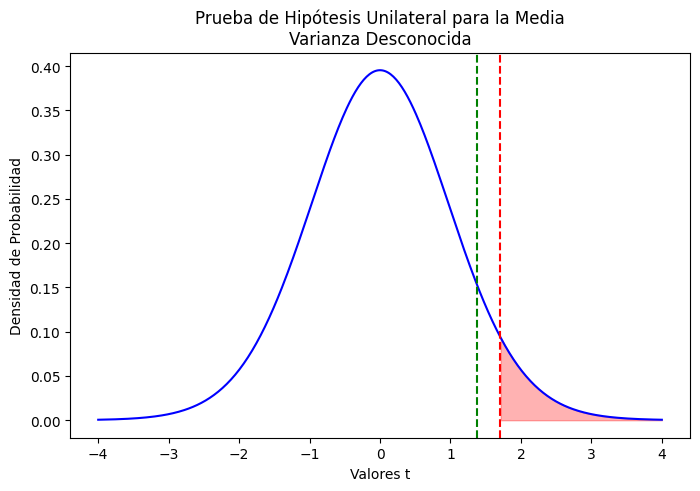

In [ ]:
# Crear un rango de valores t para la curva
t_values = np.linspace(-4, 4, 400)
t_dist = stats.t.pdf(t_values, df)

# Crear el gráfico
plt.figure(figsize=(8, 5))

# Graficar la distribución t de Student
plt.plot(t_values, t_dist, label='Distribución t', color='blue')

# Sombrear la región de no rechazo
#plt.fill_between(t_values, 0, t_dist, where=(t_values <= t_critico), color='lightgreen', alpha=0.5, label='Región de no rechazo')

# Sombrear la región de rechazo
plt.fill_between(t_values, 0, t_dist, where=(t_values > t_critico), color='red', alpha=0.3, label='Región de rechazo')

# Línea vertical para el estadístico de prueba
plt.axvline(t_stat, color='green', linestyle='--', label=f'Estadístico de prueba t = {t_stat:.2f}')

# Valor crítico
plt.axvline(t_critico, color='red', linestyle='--', label=f'Valor crítico t = {t_critico:.2f}')

# Etiquetas y leyenda
plt.title('Prueba de Hipótesis Unilateral para la Media\nVarianza Desconocida')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
#plt.legend()

# Mostrar el gráfico
plt.show()
